<a href="https://colab.research.google.com/github/brocklesby/hello-world/blob/master/pulsebeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Looking at the solution to mode-locking with dispersion and non-linearity
The solution we've seen for the electric field envelope of the mode-locked pulse is $a(t) = A_0 \left[ \mathrm{sech} \left(\frac{t}{\tau} \right) \right] ^{1 + i \beta}$. We need to explore the effect of the $1 + i \beta$ addition to our previous solution. Let's produce a quick python script to show what the pulses look like. We'll make a 10fs pulse with wavelength 2µm, and look at it's intesity, electric field, and it's spectrum when we vary $\beta$.

In [2]:
#small import block
import numpy as np
import matplotlib.pyplot as plt


Here we're just setting up the pulse parameters and the timescale

In [3]:
#set up the pulse
tau = 10e-15
lambda_ = 2000e-9
beta = 2
f0 = 3e8/lambda_
omega0 = 2 * np.pi * f0
npts = 2**12
extent =20
t = np.linspace(-tau * extent, tau*extent, int(npts))

Now we can make the carrier wave and the envelope for pulses with $\beta$ is zero or non-zero for comparison. 

In [4]:

carrier = np.exp(-1j * omega0 * t)
envelope = 1/np.cosh(t/tau)
envelope2 = 1/np.cosh(t/tau)**(1 + 1j*beta)
E1 = carrier * envelope
E2 = carrier * envelope2
I1 = np.abs(E1)**2
I2 = np.abs(E2)**2


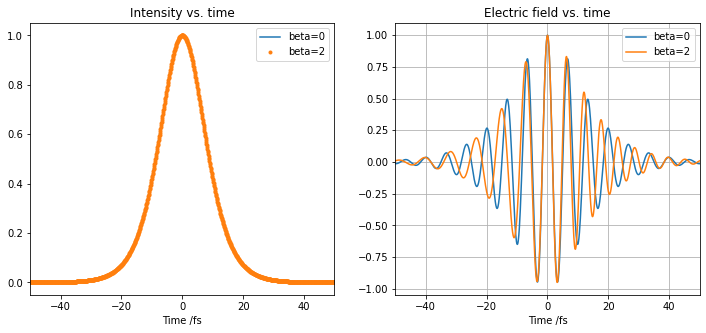

In [5]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(t*1e15, I1, label='beta=0')
ax[0].plot(t*1e15, I2, '.', label="beta={}".format(beta))
ax[0].legend()
ax[0].set_xlim([-50, 50])
ax[0].set_xlabel('Time /fs')
ax[0].set_title('Intensity vs. time')
ax[1].plot(t*1e15, np.real(E1), label='beta=0')
ax[1].plot(t*1e15, np.real(E2), label="beta={}".format(beta))
ax[1].legend()
ax[1].set_xlim([-50, 50])
ax[1].grid(True)
ax[1].set_xlabel('Time /fs')
ax[1].set_title('Electric field vs. time')
plt.show()

Looking at the E-fields, it's clear that the frequency is not constant through the pulse - the orange curve is lower frequency than the blue on the left side of the pulse but highter frequency on the right side of the pulse, so we do have some chirp going on. But have we changed the spectrum too? Thewre is a non-linear term in here so we might expect so. If we want to understand the effect of the $\beta$ parameter on the spectrum of the pulse, we can do a simple Fourier transform, and plot the spectrum for zero and non-zero $\beta$.

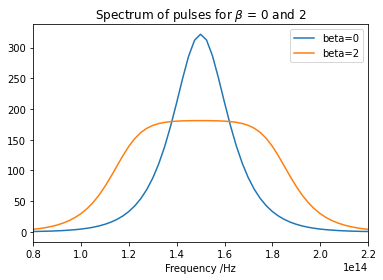

In [6]:
E1f = np.fft.fftshift(np.fft.fft(np.fft.fftshift(E1)))
E2f = np.fft.fftshift(np.fft.fft(np.fft.fftshift(E2)))
dt = t[1]-t[0]
f = (-1/dt) * np.linspace(-npts/2, npts/2-1, npts) /npts
fig, ax = plt.subplots()
ax.plot(f, np.abs(E1f), label='beta=0')
ax.plot(f, np.abs(E2f), label="beta={}".format(beta))
ax.legend()
ax.set_xlim([0.8e14, 2.2e14])
ax.set_xlabel('Frequency /Hz')
ax.set_title(r'Spectrum of pulses for $\beta$ = 0 and {}'.format(beta))
plt.show()

We can see that having non-zero $\beta$ broadens the spextrum of the pulse. This tells us straight away that if we could compensate for any chirp, we could make a *shorter* pulse that we had before adding non-linearity and dispersion. So the non-linearity and dispersion add both chirp and spectral broadening to the pulse, allowing for further compression and a shorter final pulse. 